<a href="https://colab.research.google.com/github/PouyaPishkar/BandGap/blob/main/BandGap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Dataset loaded successfully. Shape: (3626, 33)
Dataset preview:
   Unnamed: 0  Synthesizable Material ID        Formula Crystal System  \
0           0          False  mp-1204293      BH10C3NF4     Monoclinic   
1           1           True  mp-1008523           BC2N     Tetragonal   
2           2           True  mp-1214049      Ca3BCBr2N   Orthorhombic   
3           3          False   mp-759882  AgBH8C4(N2F)4      Triclinic   
4           4          False  m

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Feature scaling completed.

Data split into training and testing sets:
Training set size: 2900, Testing set size: 726
Model training completed.

Model Performance:
Mean Absolute Error (MAE): 0.450
Mean Squared Error (MSE): 0.458
Root Mean Squared Error (RMSE): 0.677
R² Score: 0.813


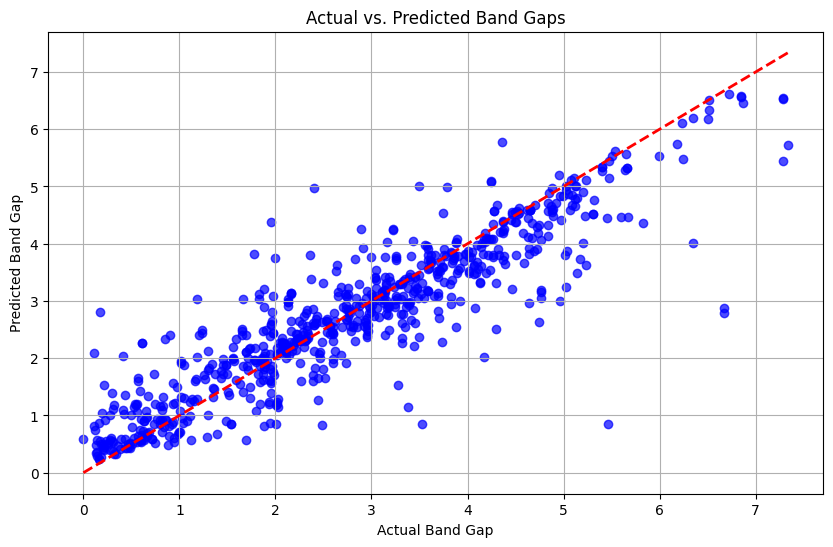

Prediction visualization completed.

Filtered Feature Importance (Importance > 0.01):
                     Feature  Importance
4221    Magnetic Ordering_NM    0.225554
8                    Density    0.169101
4          Energy Above Hull    0.163208
5           Formation Energy    0.105137
11       Total Magnetization    0.046802
...                      ...         ...
711   Material ID_mp-1202547    0.000000
3155       Formula_K5H(CN2)2    0.000000
3169      Formula_KBH4(CN4)2    0.000000
3171        Formula_KC(NO2)2    0.000000
834   Material ID_mp-1204663    0.000000

[4223 rows x 2 columns]


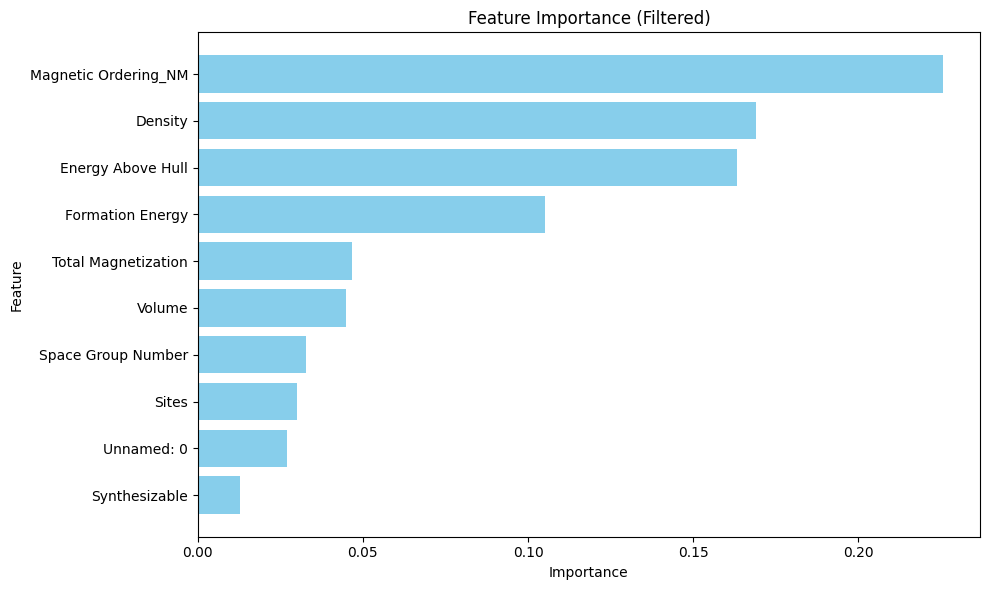

Feature importance visualization completed.


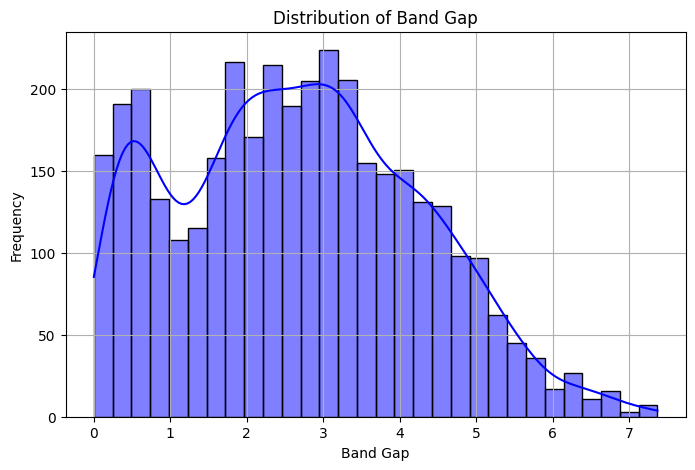

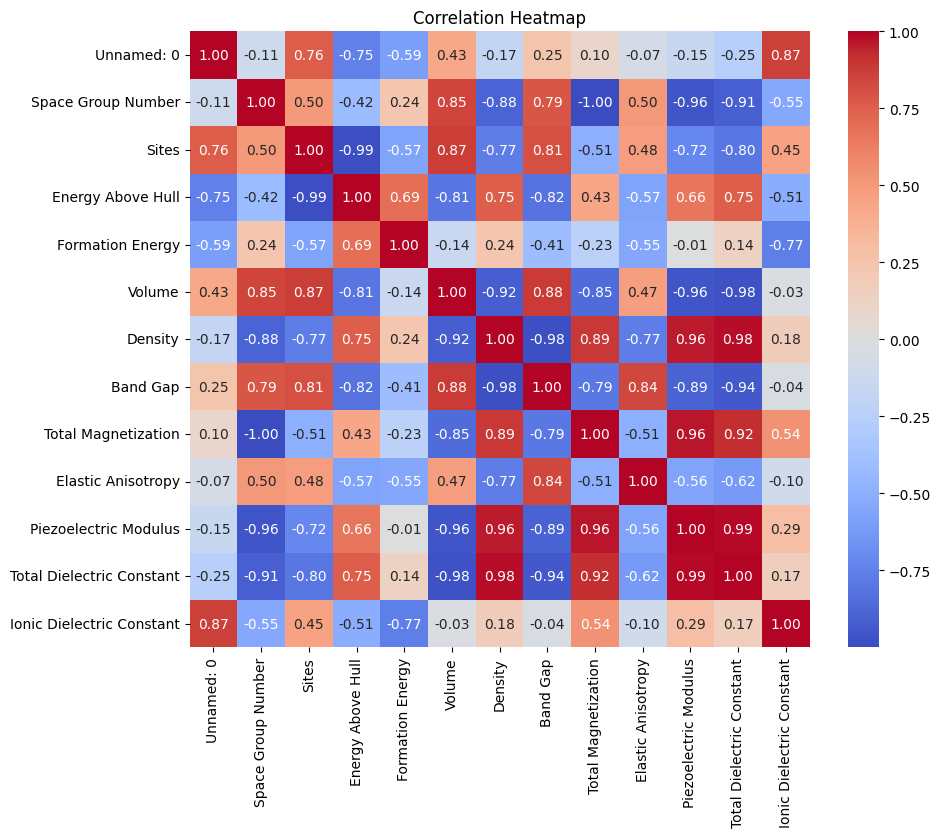

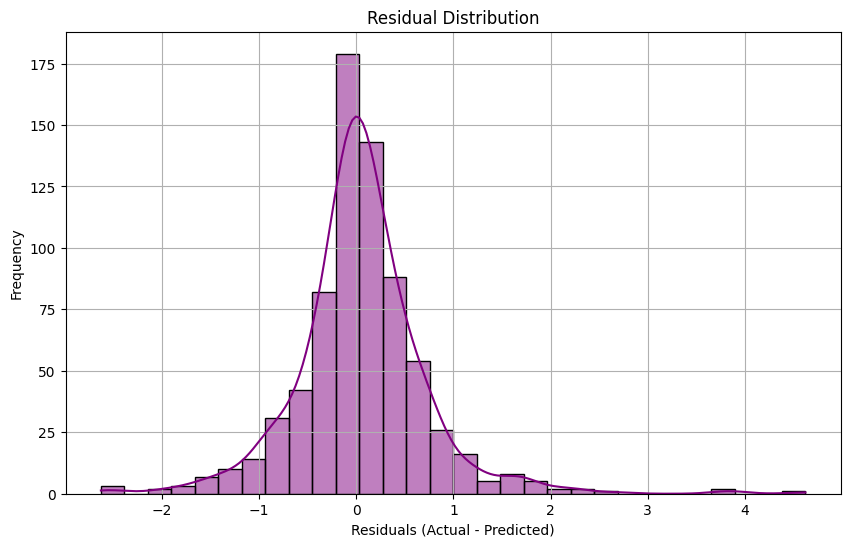

In [2]:
# Import necessary libraries
!pip install pandas numpy sklearn matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import csv

def load_dataset(file_path, target_column):
    """
    Load dataset from the provided file path and validate it.
    """
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset loaded successfully. Shape: {data.shape}")
        print("Dataset preview:")
        print(data.head())

        # Check for the target column
        if target_column not in data.columns:
            raise ValueError(f"Target column '{target_column}' not found in the dataset!")

        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise

def handle_missing_values(data, target_column):
    """
    Handle missing values in the dataset.
    """
    print("\nChecking for missing values:")
    print(data.isnull().sum())

    # Drop rows with missing target values
    data = data.dropna(subset=[target_column])
    print(f"Shape after dropping rows with missing '{target_column}': {data.shape}")

    # Fill missing values in features with column mean

    print(f"Shape after filling other missing values: {data.shape}")
    return data

def preprocess_features(data, target_column):
    """
    Separate features and target, encode categorical variables, and scale features.
    """
    X = data.drop(columns=[target_column])
    y = data[target_column]

    print("\nSeparating features and target:")
    print(f"Features shape: {X.shape}, Target shape: {y.shape}")

    # Encode categorical features
    X = pd.get_dummies(X, drop_first=True)
    print(f"Features shape after encoding categorical variables: {X.shape}")

    if X.empty:
        raise ValueError("Feature matrix X is empty after encoding!")

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("Feature scaling completed.")

    return X_scaled, y, X.columns

def train_and_evaluate_model(X_scaled, y):
    """
    Split data, train a Random Forest model, and evaluate it.
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    print("\nData split into training and testing sets:")
    print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("Model training completed.")

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("\nModel Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")

    return model, y_test, y_pred

def visualize_results(y_test, y_pred):
    """
    Visualize the actual vs. predicted values.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Band Gap")
    plt.ylabel("Predicted Band Gap")
    plt.title("Actual vs. Predicted Band Gaps")
    plt.grid()
    plt.show()
    print("Prediction visualization completed.")
def plot_learning_curve(model, X_train, y_train):
    """
    Plot a learning curve to show model performance across different training sizes.
    """
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", marker='s')
    plt.xlabel("Training Size")
    plt.ylabel("R² Score")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid()
    plt.show()
def plot_residuals(y_test, y_pred):
    """
    Plot residuals to visualize prediction errors.
    """
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30, color='purple')
    plt.title("Residual Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap for numerical features.
    """
    numeric_data = data.select_dtypes(include=[np.number])
    numeric_data = numeric_data.dropna(axis=1, how='all')

    # حذف سطرهایی که دارای NaN هستند (اختیاری: اگر فقط برای برخی مقادیر NaN دارید)
    numeric_data = numeric_data.dropna(axis=0, how='any')
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title("Correlation Heatmap")
    plt.show()

def plot_data_distribution(data, target_column):
    """
    Plot the distribution of the target variable.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data[target_column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {target_column}")
    plt.xlabel(target_column)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

def plot_feature_importance(model, feature_names):
    """
    Plot feature importance from the trained model.
    """
    if hasattr(model, "feature_importances_"):
        feature_importances = pd.DataFrame({
            'Feature': feature_names,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        threshold = 0.01
        filtered_features = feature_importances[feature_importances['Importance'] > 0.01].sort_values(by='Importance', ascending=False)

# مرتب‌سازی ویژگی‌ها بر اساس اهمیت
        if feature_importances.empty:
            print("No features have importance greater than 0.01.")
            return
        print("\nFiltered Feature Importance (Importance > 0.01):")
        print(feature_importances)
# رسم نمودار برای ویژگی‌های فیلترشده
        plt.figure(figsize=(10, 6))
        plt.barh(filtered_features['Feature'], filtered_features['Importance'], color='skyblue')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title('Feature Importance (Filtered)')
        plt.gca().invert_yaxis() # برای اینکه ویژگی‌های مهم‌تر در بالای نمودار باشند
        plt.tight_layout()
        plt.show()
        print("Feature importance visualization completed.")
    else:
        print("The model does not support feature importance.")

# Main workflow
if __name__ == "__main__":
    FILE_PATH = '/database.csv'  # Replace with your dataset path
    TARGET_COLUMN = 'Band Gap'  # Replace with your target column name

    # Step 1: Load the Dataset
    data = load_dataset(FILE_PATH, TARGET_COLUMN )

    # Step 2: Handle Missing Values
    data = handle_missing_values(data, TARGET_COLUMN)

    # Step 3: Preprocess Features and Target
    X_scaled, y, feature_names = preprocess_features(data, TARGET_COLUMN)

    # Step 4: Train and Evaluate Model
    model, y_test, y_pred = train_and_evaluate_model(X_scaled, y)

    # Step 5: Visualize Results
    visualize_results(y_test, y_pred)

    # Step 6: Plot Feature Importance
    plot_feature_importance(model, feature_names)
    plot_data_distribution(data, TARGET_COLUMN)
    plot_correlation_heatmap(data)
    plot_residuals(y_test, y_pred)